# Smart Lead Scoring Engine

### Analytics Vidhya: Job-a-thon June 2022

Problem Statement: A D2C startup develops products using cutting edge technologies like Web 3.0. Over the past few months, the company has started multiple marketing campaigns offline and digital both. As a result, the users have started showing interest in the product on the website. These users with intent to buy product(s) are generally known as leads (Potential Customers). 


Leads are captured in 2 ways - Directly and Indirectly. 


Direct leads are captured via forms embedded in the website while indirect leads are captured based on certain activity of a user on the platform such as time spent on the website, number of user sessions, etc.


Now, the marketing & sales team wants to identify the leads who are more likely to buy the product so that the sales team can manage their bandwidth efficiently by targeting these potential leads and increase the sales in a shorter span of time.


Now, as a data scientist, your task at hand is to predict the propensity to buy a product based on the user's past activities and user level information.

- Let's begin by importing the basic libraries first

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')


- Importing the dataset and storing it in a pandas dataframe
- Exploring the basic features of our dataset 

In [2]:
data = pd.read_csv('train_wn75k28.csv')
data.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
0,1,2021-01-01,1,2,2.0,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0
1,2,2021-01-01,2,1,2.0,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0
2,3,2021-01-01,9,3,3.0,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4,2021-01-01,6,7,2.0,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2021-01-01,4,6,NaN,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0


In [3]:
data.shape

(39161, 19)

In [4]:
data.dtypes

id                        int64
created_at               object
campaign_var_1            int64
campaign_var_2            int64
products_purchased      float64
signup_date              object
user_activity_var_1       int64
user_activity_var_2       int64
user_activity_var_3       int64
user_activity_var_4       int64
user_activity_var_5       int64
user_activity_var_6       int64
user_activity_var_7       int64
user_activity_var_8       int64
user_activity_var_9       int64
user_activity_var_10      int64
user_activity_var_11      int64
user_activity_var_12      int64
buy                       int64
dtype: object

In [5]:
data.isnull().sum()

id                          0
created_at                  0
campaign_var_1              0
campaign_var_2              0
products_purchased      20911
signup_date             15113
user_activity_var_1         0
user_activity_var_2         0
user_activity_var_3         0
user_activity_var_4         0
user_activity_var_5         0
user_activity_var_6         0
user_activity_var_7         0
user_activity_var_8         0
user_activity_var_9         0
user_activity_var_10        0
user_activity_var_11        0
user_activity_var_12        0
buy                         0
dtype: int64

In [6]:
data.isnull().sum()/len(data)

id                      0.000000
created_at              0.000000
campaign_var_1          0.000000
campaign_var_2          0.000000
products_purchased      0.533975
signup_date             0.385920
user_activity_var_1     0.000000
user_activity_var_2     0.000000
user_activity_var_3     0.000000
user_activity_var_4     0.000000
user_activity_var_5     0.000000
user_activity_var_6     0.000000
user_activity_var_7     0.000000
user_activity_var_8     0.000000
user_activity_var_9     0.000000
user_activity_var_10    0.000000
user_activity_var_11    0.000000
user_activity_var_12    0.000000
buy                     0.000000
dtype: float64

### Some points about data 
- It contains 39161 rows and 19 columns
- The created date and signup date columns are object data type which should be changed to datetime.
- There are null values in two columns, products_purchased and signup_date

#### Changing data type of created_at and signup_date column

- After changing, verify that the column datatype has changed by using dtypes method

In [7]:
data['created_at'] = pd.to_datetime(data['created_at'], format="%Y-%m-%d")
data['signup_date'] = pd.to_datetime(data['signup_date'], format="%Y-%m-%d")
data[['created_at', 'signup_date']].dtypes

created_at     datetime64[ns]
signup_date    datetime64[ns]
dtype: object

In [8]:
data.describe()

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
count,39161.000000,39161.000000,39161.000000,18250.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000
mean,19581.000000,6.523812,6.452746,2.154137,0.400092,0.006716,0.102832,0.011465,0.151503,0.499834,0.286612,0.174434,0.011440,0.000383,0.218942,0.000562,0.051020
std,11304.951283,3.472944,2.614296,0.779815,0.509194,0.081676,0.303743,0.106463,0.359681,0.558166,0.455784,0.379689,0.106346,0.019568,0.431544,0.023696,0.220042
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9791.000000,4.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19581.000000,6.000000,6.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,29371.000000,9.000000,8.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,39161.000000,16.000000,15.000000,4.000000,3.000000,1.000000,1.000000,1.000000,2.000000,3.000000,2.000000,2.000000,1.000000,1.000000,4.000000,1.000000,1.000000


#### Imputing Null values for products_purchased column


In [9]:
data['products_purchased'].value_counts()

2.0    8867
3.0    5024
1.0    3643
4.0     716
Name: products_purchased, dtype: int64

- Since this dataset contains information about leads and their potential conversion, it is safe to assume that the missing values under the column producs_purchased can be zero. Hence, replacing missing values with zero.

In [10]:
data['products_purchased'] = data['products_purchased'].fillna(value=0)

In [11]:
data['products_purchased'].value_counts()

0.0    20911
2.0     8867
3.0     5024
1.0     3643
4.0      716
Name: products_purchased, dtype: int64

#### Imputing Null values for signup_date column

- The number of missing values are 15113 which is 38.56% of the total data and hence, it cannot be dropped.
- Further, it is difficult to replace the missing values with any other date value.
- But the missing value may contain some pattern among themselves and so, we can add another column 'signup_na' signifying whether there is a missing value in this column or not.

In [12]:
data['signup_date'].isnull().sum()/len(data)

0.38591966497280455

In [13]:
data['signup_na'] = data['signup_date'].isnull().astype('int64')

In [14]:
data.isnull().sum()

id                          0
created_at                  0
campaign_var_1              0
campaign_var_2              0
products_purchased          0
signup_date             15113
user_activity_var_1         0
user_activity_var_2         0
user_activity_var_3         0
user_activity_var_4         0
user_activity_var_5         0
user_activity_var_6         0
user_activity_var_7         0
user_activity_var_8         0
user_activity_var_9         0
user_activity_var_10        0
user_activity_var_11        0
user_activity_var_12        0
buy                         0
signup_na                   0
dtype: int64

### Exploratory Data Analysis

Plotting various countplots as the columns contain discrete values and not continuous values.

Text(0, 0.5, 'Frequency')

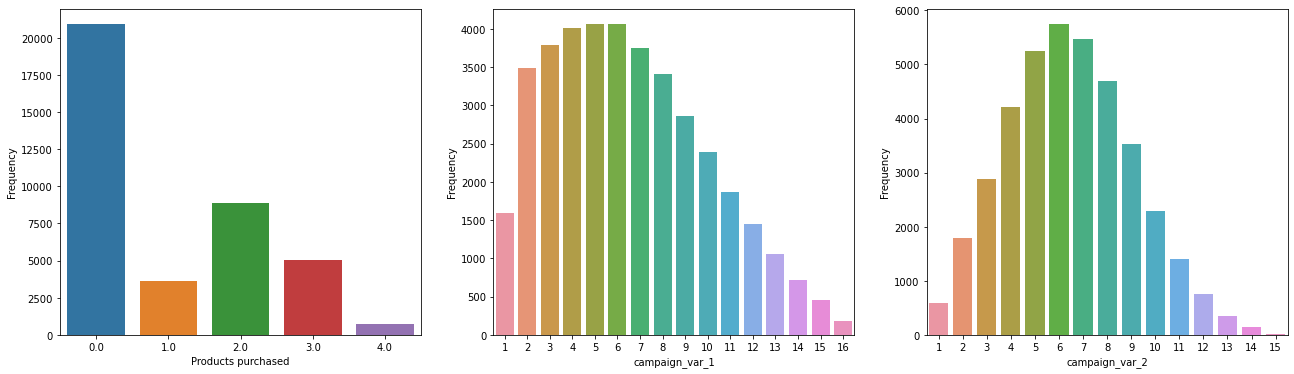

In [15]:
plt.figure(figsize=(22, 6))
#fig, axs = plt.subplot(ncols=2)

# Passenger Count
plt.subplot(131)
sns.countplot(data['products_purchased'])
plt.xlabel('Products purchased')
plt.ylabel('Frequency')


# vendor_id
plt.subplot(132)
sns.countplot(data['campaign_var_1'])
plt.xlabel('campaign_var_1')
plt.ylabel('Frequency')

# store_and_fwd_flag
plt.subplot(133)
sns.countplot(data['campaign_var_2'])
plt.xlabel('campaign_var_2')
plt.ylabel('Frequency')


### Important points 

- 0 is the most frequent value in the products_purchased column which is quite intuitive as the conversion rate of leads is generally around 50% on an average.
- It is surprising to see that 2 (and not 1) is the most commonly number of products purchased. There must be a product which is purchased with another product very frequently.
- campaign_var_1 is approximately normally distributed with slight skewness towards right but not significant.
- campaign_var_2 is a standard normal distribution.

Text(0, 0.5, 'Frequency')

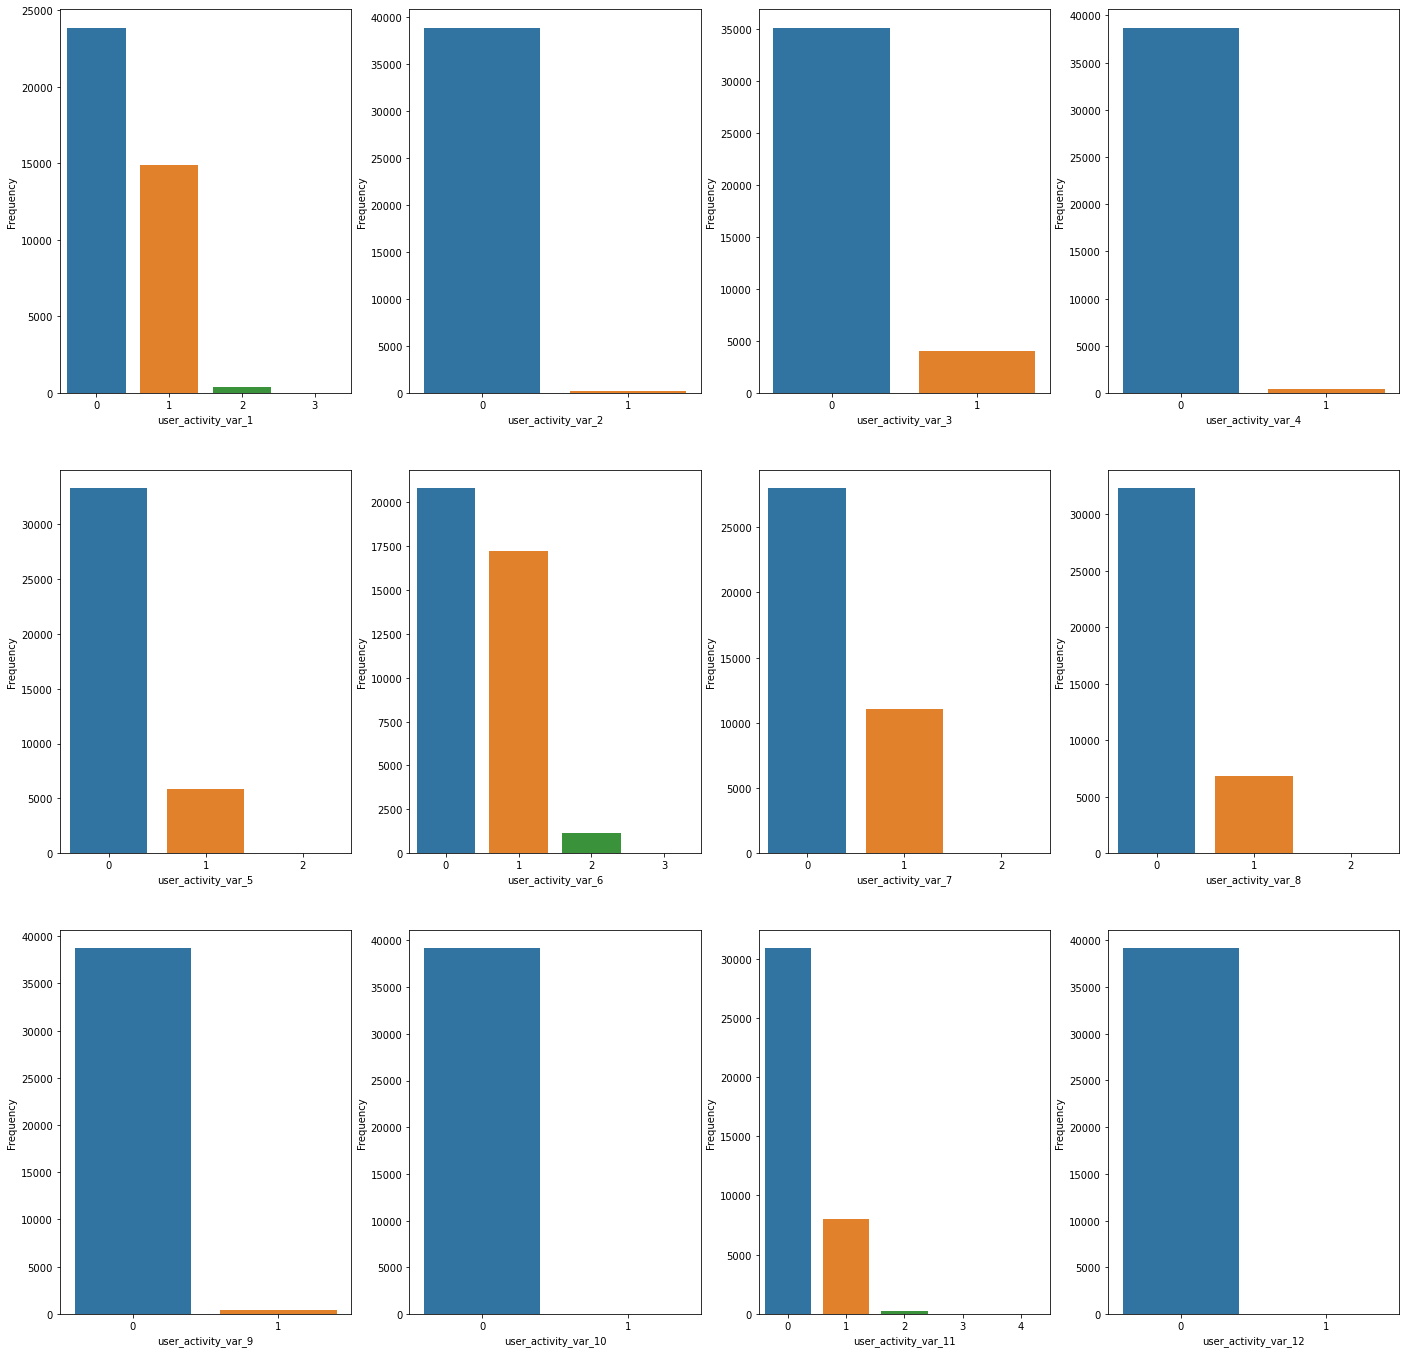

In [16]:
plt.figure(figsize=(24, 24))
#fig, axes = plt.subplot(ncols=2)

# Passenger Count
plt.subplot(341)
sns.countplot(data['user_activity_var_1'])
plt.xlabel('user_activity_var_1')
plt.ylabel('Frequency')


# vendor_id
plt.subplot(342)
sns.countplot(data['user_activity_var_2'])
plt.xlabel('user_activity_var_2')
plt.ylabel('Frequency')

# store_and_fwd_flag
plt.subplot(343)
sns.countplot(data['user_activity_var_3'])
plt.xlabel('user_activity_var_3')
plt.ylabel('Frequency')

plt.subplot(344)
sns.countplot(data['user_activity_var_4'])
plt.xlabel('user_activity_var_4')
plt.ylabel('Frequency')

plt.subplot(345)
sns.countplot(data['user_activity_var_5'])
plt.xlabel('user_activity_var_5')
plt.ylabel('Frequency')

plt.subplot(346)
sns.countplot(data['user_activity_var_6'])
plt.xlabel('user_activity_var_6')
plt.ylabel('Frequency')

plt.subplot(347)
sns.countplot(data['user_activity_var_7'])
plt.xlabel('user_activity_var_7')
plt.ylabel('Frequency')

plt.subplot(348)
sns.countplot(data['user_activity_var_8'])
plt.xlabel('user_activity_var_8')
plt.ylabel('Frequency')


plt.subplot(349)
sns.countplot(data['user_activity_var_9'])
plt.xlabel('user_activity_var_9')
plt.ylabel('Frequency')

plt.subplot(3,4,10)
sns.countplot(data['user_activity_var_10'])
plt.xlabel('user_activity_var_10')
plt.ylabel('Frequency')

plt.subplot(3,4,11)
sns.countplot(data['user_activity_var_11'])
plt.xlabel('user_activity_var_11')
plt.ylabel('Frequency')

plt.subplot(3,4,12)
sns.countplot(data['user_activity_var_12'])
plt.xlabel('user_activity_var_12')
plt.ylabel('Frequency')

### Important points

- All the user activity variables consists of few discrete values
- variables 2, 3, 4, 9, 10 and 12 contain only two possible values (0 and 1) which are heavily dominated by zero values.
- variables 5, 7 and 8 contain three distinct values (0, 1 and 2) where 2 are very few. It is again dominated by zeros.
- variables 1 and 6 contain 4 distinct values (0, 1, 2, and 3) where 0 and 1 values are significant and dominates. Values 2 is very few.
- variable 11 contains 5 distinct values where 3 and 4 are very few. 

<AxesSubplot:>

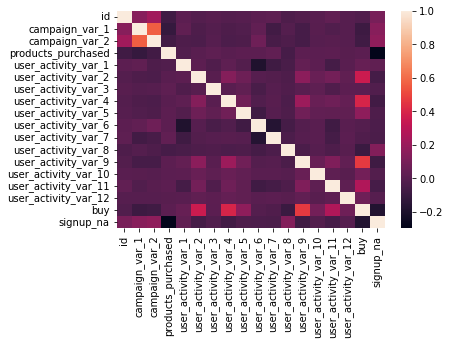

In [17]:
sns.heatmap(data.corr())

In [18]:
data.corr()

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy,signup_na
id,1.000000,0.143723,0.222746,-0.078714,0.012223,-0.011075,-0.000572,-0.015203,-0.006575,0.013992,0.016137,-0.035218,-0.019808,0.001002,0.025785,-0.009223,-0.020762,0.100583
campaign_var_1,0.143723,1.000000,0.561489,-0.114655,0.024100,-0.034548,-0.012670,-0.033510,-0.023116,0.029665,-0.072600,-0.014276,-0.058264,-0.004831,-0.022000,-0.006369,-0.087202,0.143211
campaign_var_2,0.222746,0.561489,1.000000,-0.072100,-0.032969,-0.039833,-0.008046,-0.038928,-0.030990,0.067304,-0.053462,-0.033848,-0.057942,-0.009879,-0.003890,-0.008228,-0.080064,0.162438
products_purchased,-0.078714,-0.114655,-0.072100,1.000000,-0.025418,0.004166,0.015239,0.004052,0.012253,0.011332,0.026557,-0.056785,0.013268,0.008642,0.010743,-0.000975,0.005830,-0.299612
user_activity_var_1,0.012223,0.024100,-0.032969,-0.025418,1.000000,0.014599,-0.025950,0.016656,-0.015441,-0.190784,-0.085343,-0.047157,0.034783,0.012811,-0.062915,0.002535,0.044811,0.021161
user_activity_var_2,-0.011075,-0.034548,-0.039833,0.004166,0.014599,1.000000,-0.001075,0.132108,0.060982,-0.005297,-0.020153,-0.035306,0.155794,0.046324,0.085794,0.024440,0.354627,-0.061332
user_activity_var_3,-0.000572,-0.012670,-0.008046,0.015239,-0.025950,-0.001075,1.000000,0.003023,0.023117,-0.050132,-0.006306,-0.025562,0.003898,0.019152,-0.027212,0.013261,0.005174,-0.022468
user_activity_var_4,-0.015203,-0.033510,-0.038928,0.004052,0.016656,0.132108,0.003023,1.000000,0.071339,-0.021669,-0.004572,-0.039370,0.204941,0.046924,0.067085,0.037937,0.394706,-0.076015
user_activity_var_5,-0.006575,-0.023116,-0.030990,0.012253,-0.015441,0.060982,0.023117,0.071339,1.000000,-0.078928,-0.007705,-0.031585,0.074189,0.028037,0.021225,0.022972,0.164972,-0.034952
user_activity_var_6,0.013992,0.029665,0.067304,0.011332,-0.190784,-0.005297,-0.050132,-0.021669,-0.078928,1.000000,-0.169651,-0.062460,-0.013304,0.001175,-0.076816,0.001938,-0.010951,-0.035805


In [19]:
data.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy,signup_na
0,1,2021-01-01,1,2,2.0,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0,0
1,2,2021-01-01,2,1,2.0,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0,0
2,3,2021-01-01,9,3,3.0,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,2021-01-01,6,7,2.0,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2021-01-01,4,6,0.0,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0,0


### Modelling

- Importing various algorithm, ensemble methods, metric and model_selection methods
- Split dataset into 2 parts, train and test set
- First, a baseline model with DecisionTreeclassifier, then ensemble methods.

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

- The target variable 'buy' is stored in the variable y
- From the dataset, dropping the following columns - id, created_at, signup_date, buy and storing in the variable x (the list of independent variables) 

In [21]:
y = data['buy']
x = data.drop(['id', 'created_at', 'signup_date', 'buy'], axis=1)
x.shape, y.shape

((39161, 16), (39161,))

- Splitting the dataset into train and test using stratify.
- This will ensure that the distribution of target variable is uniform in both the train and test datasets

In [22]:
train_x, test_x, train_y, test_y = train_test_split(x, y, random_state=96, stratify=y)

- Training the data on a decision tree classifier and checking train and test scores.

### Decision Tree Classifier

In [23]:
dtc = DecisionTreeClassifier(random_state=96, min_samples_split=200, max_depth=10, min_samples_leaf=40)

In [24]:
dtc.fit(train_x, train_y)
train_score = f1_score(dtc.predict(train_x), train_y)
test_score = f1_score(dtc.predict(test_x), test_y)
train_score, test_score

(0.6839422259983008, 0.6579973992197659)

On using decision tree classifier with some random value of hyperparameters, we get following value of f1_score
- Train set - 0.6839422259983008
- Test set - 0.6579973992197659

To get a better model, let's try using emsemble methods. We will start by using RandomForestClassifier.

### Random Forest Classifier

In [25]:
rf = RandomForestClassifier(random_state=96)

In [26]:
rf.fit(train_x, train_y)
train_score = f1_score(dtc.predict(train_x), train_y)
test_score = f1_score(dtc.predict(test_x), test_y)
train_score, test_score

(0.6839422259983008, 0.6579973992197659)

As we can see, the basic random forest classifier is as good as the decision tree. So, its time to do some hyperparameter tuning. We will use RandomizedSearchCV.

- For this, we will create a hyperparameter matrix and initialise the range of values which we want the RandomizedSearchCV to optimise for.
- Then, perform a randomized search for these parameters. 

In [27]:
parameters = {
    'n_estimators': range(5,100,5),
    'max_depth': range(5,15),
    'min_samples_split': range(6,20,2),
    'min_samples_leaf': range(4,10),
    'max_features': [0.4, 0.5, 0.6, 0.7]
}

In [28]:
random_search = RandomizedSearchCV(estimator=rf, param_distributions=parameters, 
                                   random_state=96, scoring=f1_score, cv=5)

In [29]:
random_search.fit(train_x, train_y)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=96),
                   param_distributions={'max_depth': range(5, 15),
                                        'max_features': [0.4, 0.5, 0.6, 0.7],
                                        'min_samples_leaf': range(4, 10),
                                        'min_samples_split': range(6, 20, 2),
                                        'n_estimators': range(5, 100, 5)},
                   random_state=96,
                   scoring=<function f1_score at 0x7fc1d4213ca0>)

- Our model is trained, so let's check for the best combination for hyperparamters.
- After that, we will initialise these tuned values of hyperparameters and train the model again and evaluate performance using f1_score.

In [30]:
random_search.best_params_

{'n_estimators': 95,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 0.6,
 'max_depth': 9}

In [31]:
rf = RandomForestClassifier(n_estimators=95, min_samples_split=10, min_samples_leaf=4, 
                            max_features=0.6, max_depth=9, random_state=96)

In [32]:
rf.fit(train_x, train_y)
train_score = f1_score(rf.predict(train_x), train_y)
test_score = f1_score(rf.predict(test_x), test_y)
train_score, test_score

(0.6919104991394147, 0.6579634464751959)

Here, we can see that our model has not improved much even with the tuned parameters. Now, we will try another ensemble method which is gradient boosting algorithm. For this purpose, we will import XGBoostClassifier

### XGBoost

In [33]:
from xgboost import XGBClassifier

In [34]:
xgb = XGBClassifier(random_state=96)

In [35]:
xgb.fit(train_x, train_y)
train_pred = xgb.predict(train_x)
test_pred = xgb.predict(test_x)
train_score = f1_score(train_pred, train_y)
test_score = f1_score(test_pred, test_y)
train_score, test_score

(0.7482546201232033, 0.6625)

As we can see,just with the use of XGboost, our score has improved although not much but it still is improvement. Let's see if we can improve this more with the use of hyperparameter tuning.

In [36]:
parameters = {
    'max_depth': range(8,15),
    'n_estimators': range(50,90,5),
    'learning_rate': range(3,10),
    'reg_lambda': range(700,1100,100)   
}

In [37]:
random_search = RandomizedSearchCV(estimator=xgb, param_distributions=parameters, random_state=96, 
                                   scoring=f1_score, cv=4)

In [38]:
random_search.fit(train_x, train_y)
random_search.best_params_

{'reg_lambda': 700, 'n_estimators': 75, 'max_depth': 10, 'learning_rate': 3}

In [39]:
xgb = XGBClassifier(random_state=96, max_depth=10, n_estimators=75, learning_rate=3, 
                    reg_lambda=700, objective='binary:logistic')
xgb.fit(train_x, train_y)
train_pred = xgb.predict(train_x)
test_pred = xgb.predict(test_x)
train_score = f1_score(train_pred, train_y)
test_score = f1_score(test_pred, test_y)
train_score, test_score

(0.7295183202964183, 0.6658322903629538)

Earlier, the score was 
- Train set: 0.7482546201232033
- Test set: 0.6625

With use of tuned hyperparameters, the test score has improved. The train score has gone down slightly but the difference between train and test score has decreased which is what happens when we move from a more over-fitted model to a more generalised model.
- Train set: 0.7295183202964183
- Test set: 0.6658322903629538

#### On trying to improve the score further, some manual hit and trial is done and the score has further improved with the combination of these parameters

In [45]:
xgb_final = XGBClassifier(random_state=96, max_depth=15, n_estimators=40, learning_rate=5, reg_alpha=4,
                    reg_lambda=1000, objective='binary:logistic')
xgb_final.fit(train_x, train_y)
train_pred = xgb_final.predict(train_x)
test_pred = xgb_final.predict(test_x)
train_score = f1_score(train_pred, train_y)
test_score = f1_score(test_pred, test_y)
train_score, test_score

(0.7207281754240794, 0.6733668341708543)

## Final prediction using best-trained model and exporting the output

Importing the test data on which predictions are required to be done and submitted.

- After doing all the pre-processing, we will take predictions against the test data from our best trained model.


In [41]:
test_data = pd.read_csv('test_Wf7sxXF.csv')
test_data['created_at'] = pd.to_datetime(test_data['created_at'], format="%Y-%m-%d")
test_data['signup_date'] = pd.to_datetime(test_data['signup_date'], format="%Y-%m-%d")
test_data['products_purchased'] = test_data['products_purchased'].fillna(value=0)
test_data['signup_na'] = test_data['signup_date'].isnull().astype('int64')

In [42]:
test_data.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,signup_na
0,39162,2022-01-01,2,2,0.0,2021-08-17,1,1,0,0,0,1,0,0,0,0,1,0,0
1,39163,2022-01-01,4,7,3.0,2020-05-21,1,0,0,0,0,0,0,1,0,0,0,0,0
2,39164,2022-01-01,8,7,0.0,NaT,0,0,0,0,1,1,0,0,0,0,0,0,1
3,39165,2022-01-01,9,8,2.0,2020-06-22,0,0,0,0,1,1,1,0,0,0,2,0,0
4,39166,2022-01-01,4,5,2.0,2021-03-10,1,0,0,0,0,0,0,0,0,0,0,0,0


In [43]:
id_value = test_data['id']
test_data = test_data.drop(['id', 'created_at', 'signup_date'], axis=1)

In [48]:
test_pred = xgb_final.predict(test_data)
test_pr = pd.Series(test_pred)
final = pd.concat([id_value, test_pr], names=['id', 'buy'], axis=1)
final.columns = ['id', 'buy']
final = final.set_index('id')
final.to_csv('xgboost_best_output3.csv')